In [ ]:
from sklearn.pipeline import Pipeline # Usado para el preprocesamiento (hacer pasos secuenciales)
from sklearn.compose import ColumnTransformer #Usado para la trasnformaciones en columnas
from sklearn.impute import SimpleImputer #Para sustituir valores nulos por valores en tendencia
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler # se explica abajo
from sklearn.linear_model import LinearRegression #para regresion lineal
import pandas as pd #pandas
import matplotlib as plt # matplotlib
from sklearn.model_selection import train_test_split #modelo de entrenamiento y prueba


In [72]:
Music_dataset = pd.read_csv('mxmh_survey_results.csv') # Leer el dataset

#Borramos columnas inecesarias 
Music_dataset = Music_dataset.drop(columns=['Timestamp', 'Primary streaming service','While working','Music effects',
                                            'Instrumentalist','Composer','Exploratory',
                                            'Foreign languages', 'BPM', 'Permissions'])
Music_dataset

,Age,Hours per day,Fav genre,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],...,Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD
0,18.0,3.0,Latin,Rarely,Never,Rarely,Never,Never,Sometimes,Never,...,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,1.0,1.0,1.0
1,63.0,1.5,Rock,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,...,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0
2,18.0,4.0,Video game music,Never,Never,Very frequently,Never,Never,Rarely,Rarely,...,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,11.0,2.0
3,61.0,2.5,Jazz,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,...,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0
4,18.0,4.0,R&B,Never,Never,Rarely,Never,Rarely,Very frequently,Never,...,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,2.0,Rock,Very frequently,Rarely,Never,Sometimes,Never,Sometimes,Rarely,...,Rarely,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,1.0,9.0
732,18.0,1.0,Pop,Rarely,Rarely,Never,Never,Never,Never,Rarely,...,Never,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0
733,19.0,6.0,Rap,Rarely,Sometimes,Sometimes,Rarely,Rarely,Very frequently,Rarely,...,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0
734,19.0,5.0,Classical,Very frequently,Never,Never,Never,Never,Never,Rarely,...,Never,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0


### Clasificar y convertir datos

In [73]:
# Definir X y Y (capturar datos con la cual se va a hacer la predicción)
X = Music_dataset[['Age', 'Hours per day', 'Fav genre', 'Frequency [Classical]', 
                   'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 
                   'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 
                   'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 
                   'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 
                   'Frequency [Rock]', 'Frequency [Video game music]']] # Datos a usar

Y = Music_dataset[['Anxiety', 'Depression', 'Insomnia', 'OCD']] # Datos a predecir

# Definir las categorías para las columnas ordinales 
categories = [['Never', 'Rarely', 'Sometimes', 'Very frequently']]

# Crear un ColumnTransformer para manejar diferentes tipos de datos 
preprocessor = ColumnTransformer( 
    transformers=[ 
        ('freq', OrdinalEncoder(categories=categories * len([col for col in X.columns if 'Frequency' in col])), 
         [col for col in X.columns if 'Frequency' in col]), # para codificar las columnas de frecuencia  
        ('genre', OneHotEncoder(), ['Fav genre']), # Codificamos para hacer variables dummy (convertida para usarla en info categorica)
        ('num', StandardScaler(), ['Age', 'Hours per day']) # Escalamos las columnas numericas
    ], 
    remainder='passthrough' 
)

# pipeline para aplicar el preprocesamiento y el modelo de regresión lineal 
pipeline = Pipeline(steps=[ 
    ('preprocessor', preprocessor), # Ahora si hacemos la transformacion de datos
    ('imputer', SimpleImputer(strategy='mean')),  # Evitar errores por valores faltantes
    ('model', LinearRegression()) # Hacemos regresion lineal
])


### Entrenamiento

In [74]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Entrenamiento del modelo
pipeline.fit(X_train, y_train) # Usamos a pipeline porque es el que hace la segmentacion de pasos

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('freq',
                                                  OrdinalEncoder(categories=[['Never',
                                                                              'Rarely',
                                                                              'Sometimes',
                                                                              'Very '
                                                                              'frequently'],
                                                                             ['Never',
                                                                              'Rarely',
                                                                              'Sometimes',
                                                                              'Very '
                                                                              'frequently'],
                                                                             ['Never',
                                                                              'Rarely',
                                                                              'Sometimes',
                                                                              'Very '
                                                                              'frequently'],
                                                                             ['Never',
                                                                              'Rarely',
                                                                              'Sometimes',
                                                                              'Very '
                                                                              'frequently'],
                                                                             ['Never',
                                                                              'Rarely',
                                                                              'Sometime...
                                                   'Frequency [Hip hop]',
                                                   'Frequency [Jazz]',
                                                   'Frequency [K pop]',
                                                   'Frequency [Latin]',
                                                   'Frequency [Lofi]',
                                                   'Frequency [Metal]',
                                                   'Frequency [Pop]',
                                                   'Frequency [R&B]',
                                                   'Frequency [Rap]',
                                                   'Frequency [Rock]',
                                                   'Frequency [Video game '
                                                   'music]']),
                                                 ('genre', OneHotEncoder(),
                                                  ['Fav genre']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Hours per day'])])),
                ('imputer', SimpleImputer()), ('model', LinearRegression())])

### Pruebas

In [76]:
# Ejemplo de nuevos datos 
nuevos_datos = pd.DataFrame({
    'Age': [25],
    'Hours per day': [4],
    'Fav genre': ['Rock'],
    'Frequency [Classical]': ['Never'],
    'Frequency [Country]': ['Rarely'],
    'Frequency [EDM]': ['Never'],
    'Frequency [Folk]': ['Rarely'],
    'Frequency [Gospel]': ['Never'],
    'Frequency [Hip hop]': ['Very frequently'],
    'Frequency [Jazz]': ['Never'],
    'Frequency [K pop]': ['Never'],
    'Frequency [Latin]': ['Very frequently'],
    'Frequency [Lofi]': ['Sometimes'],
    'Frequency [Metal]': ['Rarely'],
    'Frequency [Pop]': ['Very frequently'],
    'Frequency [R&B]': ['Sometimes'],
    'Frequency [Rap]': ['Sometimes'],
    'Frequency [Rock]': ['Sometimes'],
    'Frequency [Video game music]': ['Sometimes']
})

# Hacer predicciones con los nuevos datos
predicciones_nuevas = pipeline.predict(nuevos_datos)


In [77]:
# Calcular el porcentaje de cada condición 
def calcular_porcentajes(predicciones): 
    total = sum(predicciones[0]) 
    porcentajes = [100 * (value / total) for value in predicciones[0]] 
    return porcentajes

# Calcular y mostrar los porcentajes 
porcentajes = calcular_porcentajes(predicciones_nuevas) 
print(f"\nPredicciones para los nuevos datos:") 
print(f"Porcentaje de Ansiedad: {porcentajes[0]:.2f}%") 
print(f"Porcentaje de Depresión: {porcentajes[1]:.2f}%") 
print(f"Porcentaje de Insomnio: {porcentajes[2]:.2f}%") 
print(f"Porcentaje de OCD: {porcentajes[3]:.2f}%")


Predicciones para los nuevos datos:
Porcentaje de Ansiedad: 31.74%
Porcentaje de Depresión: 28.80%
Porcentaje de Insomnio: 24.82%
Porcentaje de OCD: 14.64%


## Graficas de Promedios

AttributeError: module 'matplotlib' has no attribute 'title'

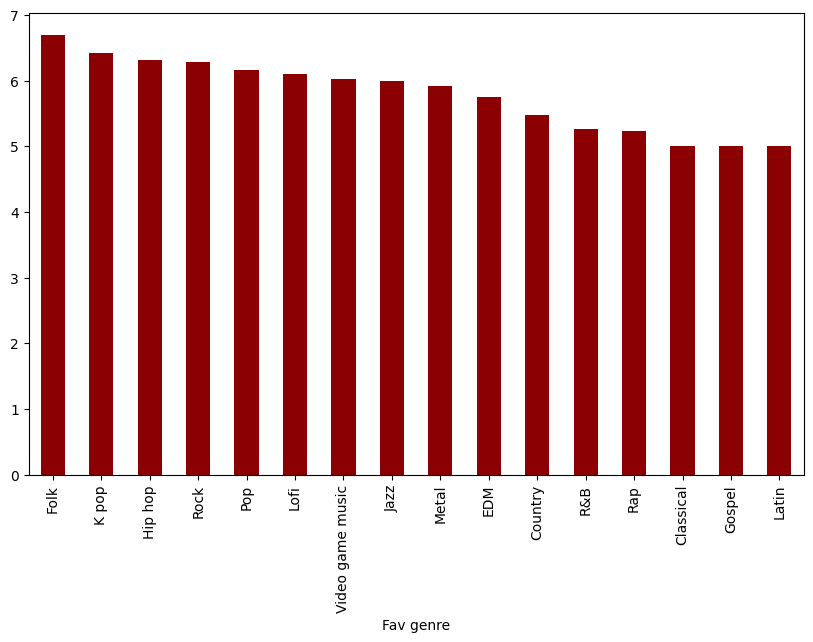

In [78]:
# Agrupar por 'Fav genre' y calcular el promedio de ansiedad
promedio_ansiedad_genero = Music_dataset.groupby('Fav genre')['Anxiety'].mean()

# Visualizar con un gráfico de barras
promedio_ansiedad_genero.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color='Darkred')
plt.title('Promedio de Niveles de Ansiedad por Género Musical')
plt.ylabel('Nivel de Ansiedad Promedio')
plt.xlabel('Género Musical')
plt.show()

AttributeError: module 'matplotlib' has no attribute 'title'

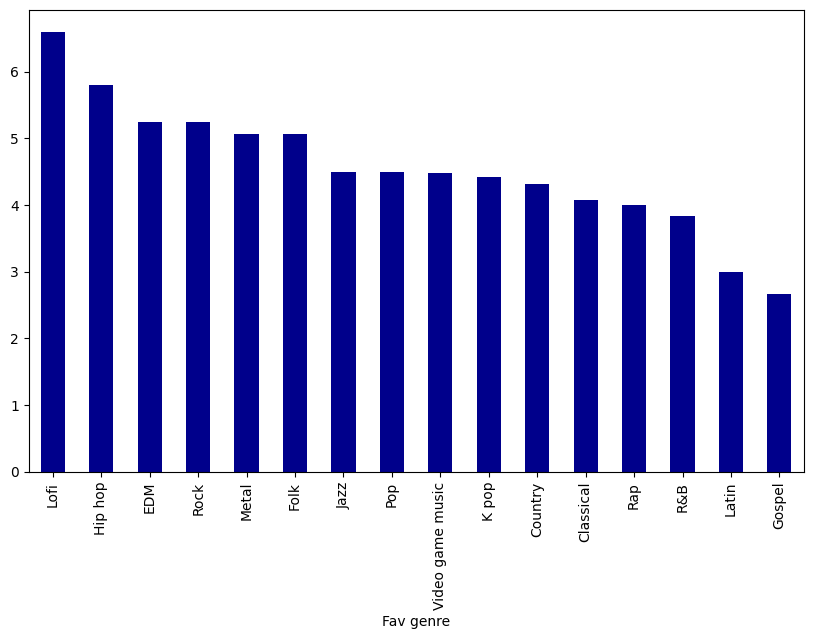

In [ ]:
# Agrupar por 'Fav genre' y calcular el promedio de depresion
promedio_depresion_genero = Music_dataset.groupby('Fav genre')['Depression'].mean()

# Visualizar con un gráfico de barras
promedio_depresion_genero.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color='Darkblue')
plt.title('Promedio de Niveles de Depresion por Género Musical')
plt.ylabel('Nivel de Depresion Promedio')
plt.xlabel('Género Musical')
plt.show()

AttributeError: module 'matplotlib' has no attribute 'title'

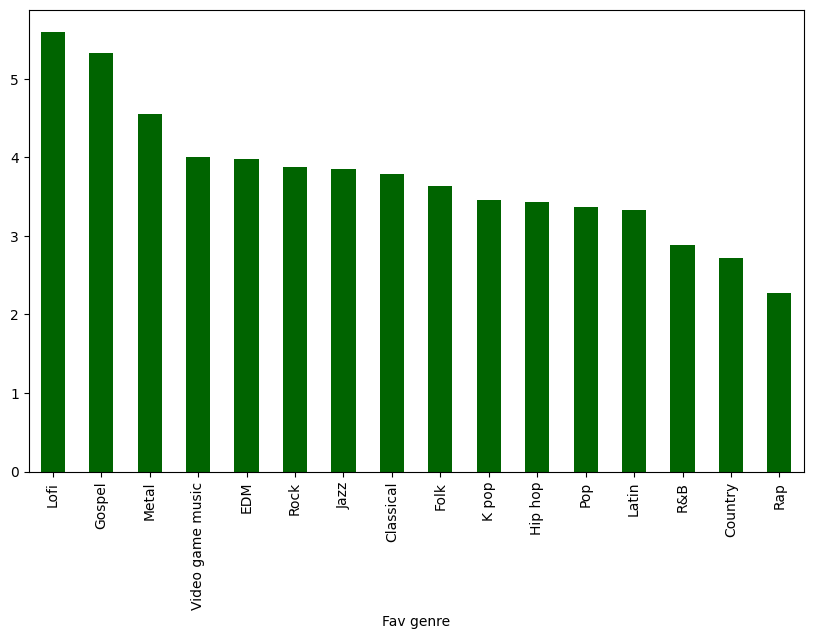

In [ ]:
# Agrupar por 'Fav genre' y calcular el promedio de Insomnio
promedio_Insomnio_genero = Music_dataset.groupby('Fav genre')['Insomnia'].mean()

# Visualizar con un gráfico de barras
promedio_Insomnio_genero.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color='DarkGreen')
plt.title('Promedio de Niveles de Insomnio por Género Musical')
plt.ylabel('Nivel de Insomnio Promedio')
plt.xlabel('Género Musical')
plt.show()

AttributeError: module 'matplotlib' has no attribute 'title'

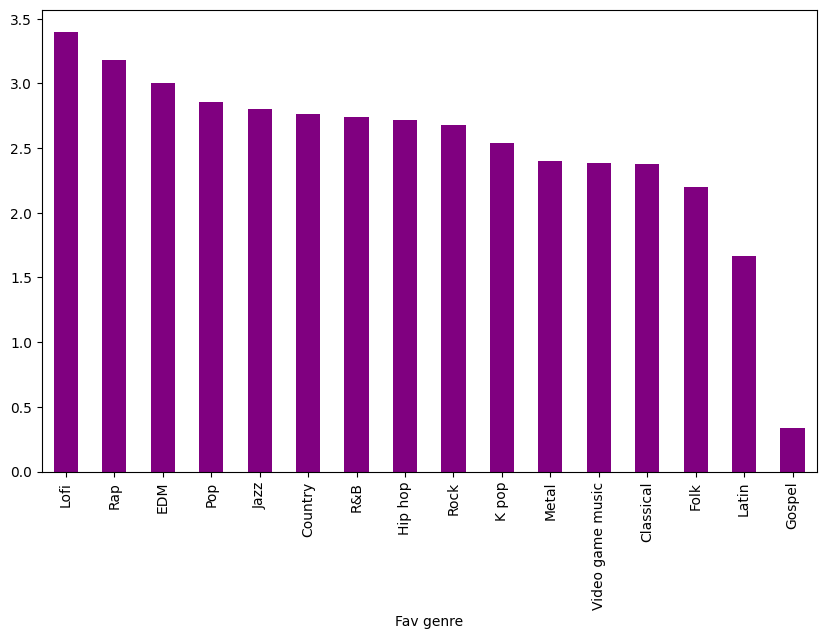

In [ ]:
# Agrupar por 'Fav genre' y calcular el promedio de Insomnio
promedio_OCD_genero = Music_dataset.groupby('Fav genre')['OCD'].mean()

# Visualizar con un gráfico de barras
promedio_OCD_genero.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color='purple')
plt.title('Promedio de Niveles de OCD por Género Musical')
plt.ylabel('Nivel de OCD Promedio')
plt.xlabel('Género Musical')
plt.show()